#  Loan status prediction using logistic regression 

Credit Risk data for loan_status prediction logistic regression is a widely used and interpretable method for loan status prediction in credit risk analysis, providing valuable insights into the factors influencing loan defaults and helping financial institutions make informed lending decisions.

In [1]:
import pandas as pd
import numpy as np

In [2]:
cr=pd.read_csv(r"CreditRisk.csv")

In [3]:
cr.shape

(981, 13)

In [4]:
cr.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0.0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,4.0,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2.0,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1.0,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [5]:
cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    float64
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        981 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 99.8+ KB


In [6]:
cr.isnull().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
cr.Married.value_counts()

Married
Yes    631
No     347
Name: count, dtype: int64

In [8]:
cr.Married = cr.Married.fillna('Yes')
cr.Gender = cr.Gender.fillna('Male')
cr.Self_Employed = cr.Self_Employed.fillna('No')
cr.Credit_History = cr.Credit_History.fillna(0)
cr.LoanAmount=cr.LoanAmount.fillna(cr.LoanAmount.mean())
cr.Dependents=cr.Dependents.fillna(0)
cr.Loan_Amount_Term=cr.Loan_Amount_Term.fillna(cr.Loan_Amount_Term.mean())

In [9]:
cr=cr.drop(["Loan_ID"], axis=1)

In [10]:
cr.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
le=LabelEncoder()

In [13]:
cr[cr.select_dtypes(include=['object']).columns]=cr[cr.select_dtypes(include=['object']).columns].apply(le.fit_transform)

In [14]:
cr.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,5849,0.0,142.51153,360.0,1.0,2,1
1,1,1,1.0,0,0,4583,1508.0,128.00000,360.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.00000,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.00000,360.0,1.0,2,1
4,1,0,0.0,0,0,6000,0.0,141.00000,360.0,1.0,2,1


In [15]:
#sampling

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
cr_train, cr_test= train_test_split(cr, test_size=0.2)

In [18]:
cr_train_x=cr_train.iloc[:, 0:-1]
cr_train_y=cr_train.iloc[:, -1]

In [19]:
cr_test_x=cr_test.iloc[:, 0:-1]
cr_test_y=cr_test.iloc[:, -1]

In [20]:
cr_train_x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
391,1,1,4.0,0,0,9504,0.0,275.0,360.0,1.0,0
790,1,1,2.0,1,0,2500,3333.0,131.0,360.0,1.0,2
637,0,0,0.0,1,0,3765,0.0,125.0,360.0,1.0,2
137,1,1,2.0,0,1,3316,3500.0,88.0,360.0,1.0,2
732,0,0,0.0,0,0,1762,2666.0,104.0,360.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
592,1,0,4.0,0,1,9357,0.0,292.0,360.0,1.0,1
800,1,1,2.0,1,0,4521,1184.0,150.0,360.0,1.0,1
922,1,1,1.0,0,0,6825,0.0,162.0,360.0,1.0,0
34,1,0,4.0,0,0,12500,3000.0,320.0,360.0,1.0,0


In [21]:
cr_train_y

391    1
790    1
637    1
137    1
732    0
      ..
592    1
800    1
922    1
34     0
190    1
Name: Loan_Status, Length: 784, dtype: int32

In [22]:
#model building

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
logi_cr=LogisticRegression()

In [25]:
logi_cr.fit(cr_train_x, cr_train_y)

C:\Users\Janhavi Gadge\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
#prediction

In [27]:
pred=logi_cr.predict(cr_test_x)

In [28]:
pred

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0])

In [29]:
#evaluation

In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
cr_tab=  confusion_matrix(cr_test_y, pred)
cr_tab

array([[ 33,  26],
       [ 11, 127]], dtype=int64)

In [32]:
#accuracy
cr_tab.diagonal().sum()*100/ cr_tab.sum()

81.21827411167513

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
accuracy_score(cr_test_y, pred)*100

81.21827411167513

In [35]:
#tpr (recall)
from sklearn.metrics import recall_score


In [36]:
recall_score(cr_test_y, pred)*100

92.02898550724638

In [37]:
#precision
from sklearn.metrics import precision_score

In [38]:
precision_score(cr_test_y, pred)*100

83.00653594771242

In [39]:
#F1 RATIO= 2*recall*precision/recall+ precision
from sklearn.metrics import f1_score

In [40]:
f1_score(cr_test_y, pred)*100

87.2852233676976

In [41]:
pred=logi_cr.predict(cr_test_x)
pred

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0])

In [42]:
pred_proba= logi_cr.predict_proba(cr_test_x)

In [43]:
pred_proba

array([[0.12277565, 0.87722435],
       [0.05283036, 0.94716964],
       [0.7087211 , 0.2912789 ],
       [0.12375819, 0.87624181],
       [0.06840614, 0.93159386],
       [0.27295011, 0.72704989],
       [0.1591558 , 0.8408442 ],
       [0.54838297, 0.45161703],
       [0.12989665, 0.87010335],
       [0.5637078 , 0.4362922 ],
       [0.103827  , 0.896173  ],
       [0.31883976, 0.68116024],
       [0.86423849, 0.13576151],
       [0.1822235 , 0.8177765 ],
       [0.61596295, 0.38403705],
       [0.2282961 , 0.7717039 ],
       [0.06651007, 0.93348993],
       [0.69063437, 0.30936563],
       [0.06970696, 0.93029304],
       [0.63326631, 0.36673369],
       [0.26112643, 0.73887357],
       [0.05722806, 0.94277194],
       [0.10122398, 0.89877602],
       [0.60112167, 0.39887833],
       [0.80434705, 0.19565295],
       [0.13395919, 0.86604081],
       [0.20575582, 0.79424418],
       [0.10905203, 0.89094797],
       [0.07080482, 0.92919518],
       [0.29810518, 0.70189482],
       [0.

In [44]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [45]:
roc_auc_score(cr_test_y, pred)*100

73.98059444853844

In [46]:
pred_proba[:, 1]

array([0.87722435, 0.94716964, 0.2912789 , 0.87624181, 0.93159386,
       0.72704989, 0.8408442 , 0.45161703, 0.87010335, 0.4362922 ,
       0.896173  , 0.68116024, 0.13576151, 0.8177765 , 0.38403705,
       0.7717039 , 0.93348993, 0.30936563, 0.93029304, 0.36673369,
       0.73887357, 0.94277194, 0.89877602, 0.39887833, 0.19565295,
       0.86604081, 0.79424418, 0.89094797, 0.92919518, 0.70189482,
       0.86904769, 0.86597886, 0.33737962, 0.72534494, 0.89234292,
       0.3093846 , 0.93375331, 0.70331831, 0.8830333 , 0.75903779,
       0.4176872 , 0.78822788, 0.83300271, 0.37123062, 0.33267305,
       0.78185362, 0.8984783 , 0.80814741, 0.29711301, 0.83790267,
       0.78107092, 0.79093306, 0.64997844, 0.88517987, 0.75469397,
       0.88508239, 0.78805154, 0.58919299, 0.15951608, 0.91749535,
       0.7226397 , 0.92653953, 0.56236896, 0.46499099, 0.8108007 ,
       0.75422901, 0.95737979, 0.50858055, 0.82978007, 0.54895434,
       0.9289571 , 0.90631376, 0.54692705, 0.76443337, 0.85546

In [47]:
#plot roc curve
fpr, tpr, ther= roc_curve(cr_test_y, pred_proba[:, 1])

In [48]:
import matplotlib.pyplot as plt

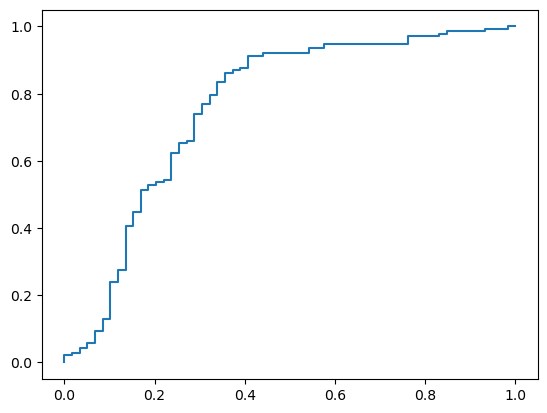

In [49]:
plt.plot(fpr, tpr)

Text(0.5, 0.5, 'Auroc is 73.98')

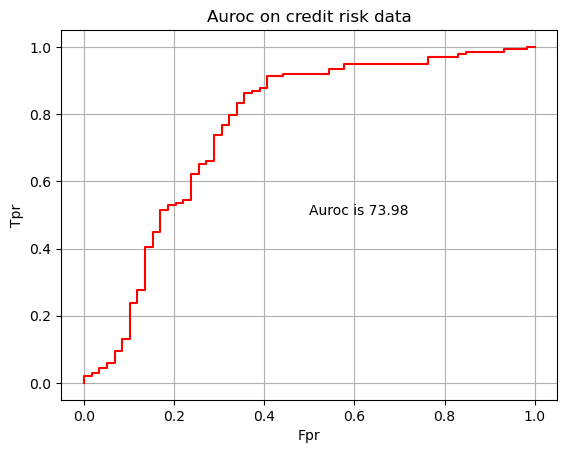

In [51]:
plt.plot(fpr, tpr, color='r')
plt.xlabel('Fpr')
plt.ylabel('Tpr')
plt.title('Auroc on credit risk data')
plt.grid()
plt.text(x=.5, y=.5, s='Auroc is 73.98')